## Model Training Using Auto Encoder and Decision Tree
 The model is trained on the real estate dataset having multiple features and samples. I have first worked on the model and trained it using simnple regression tree and then i have checked the performance of a model which was satissfactor . But when I used the auto encoder on the same model with decision tree then it gave me a brilliant result with enough good performance.
 I have imported many frame works and Libraries to deal with this dataset . My model trained with the help of keras, tensorflow and sklearn.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import sklearn as sk
from tensorflow.keras.layers import Input, Dense

%matplotlib inline


In [ ]:
df=pd.read_csv("/content/sample_data/Real estate.csv")
df.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [ ]:
print("Number of rows in the dataset:",df.shape[0])
print("Number of columns in the dataset:",df.shape[1])
print("Null values in the dataset:",df.columns[df.isnull().any().tolist()])

Number of rows in the dataset: 414
Number of columns in the dataset: 8
Null values in the dataset: Index([], dtype='object')


Data Augmentation one of the finest techniques used during training a model to boost the performance and make a model more generalize for unseen set of data during processing. Data Augmentation technique apply when the training dataset are not enough for a model to train it well . This technique add in many Neural network models like CNN, ANN and MLP during training a  model.

I have used this technique because the dataset which i have imported contain less samples which is about 414 samples with 7 features. So to make a model more robustable and well trained I have add noised in the data and add more samples in the dataset. Now My dataset contain about 12 hundred samples which is two times greater than actual ones.

In [ ]:
def add_noise(data, noise_level=0.005):
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise

def augment_with_noise(df, num_augmentations=2, noise_level=0.005):
    augmented_data = [df]
    print("the number of augmentaion is:", num_augmentations)
    for _ in range(num_augmentations):
        df_noisy = df.copy()
        for col in ['X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area']:
            df_noisy[col] = add_noise(df_noisy[col], noise_level)
        augmented_data.append(df_noisy)
    return pd.concat(augmented_data, ignore_index=True)

# Generate noisy samples
df_noisy = augment_with_noise(df, num_augmentations=2)
df_noisy.head(5)


the number of augmentaion is: 2


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10.0,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9.0,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5.0,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5.0,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5.0,24.97937,121.54245,43.1


In [ ]:
#check the number of rows and columns ..
#check the null values ...
print("Number of rows after Augmentation in the dataset:",df_noisy.shape[0])
print("Number of columns after Augmentation in the dataset:",df_noisy.shape[1])
print("Null values in the dataset after Augmentation:",df_noisy.columns[df_noisy.isnull().any().tolist()])

Number of rows after Augmentation in the dataset: 1242
Number of columns after Augmentation in the dataset: 8
Null values in the dataset after Augmentation: Index([], dtype='object')


Data splitting is a technique used to split the dataset into traing and testing set of data. This is most commonly used in the neural networks to train and test the model.

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_values=df_noisy.drop(['Y house price of unit area'],axis=1)
y_values=df_noisy['Y house price of unit area']
X_encoded_train, X_encoded_test, y_train, y_test= train_test_split(X_values, y_values, test_size=0.2, random_state=0)

Normalization is a technique that is most commonly used during preprocessing to manage data efficently and feed it to the model, so that a model can learn more from training set of data. Here I have applied the Normlaization tehcnique called the Standarization which make a features more manageable and its values lye between 1 and 0. This technique apply whend the dataset are far away from each other .

In [ ]:
#now perform standard normalization on the set of data ..
standard_scaler=StandardScaler()
columns_to_normalize = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
                        'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area']

standard_scaler = StandardScaler()

df_noisy[columns_to_normalize] = standard_scaler.fit_transform(df_noisy[columns_to_normalize])
df_noisy.head(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,-0.823683,1.255630,-0.792495,2.007390,1.073748,0.424491,-0.005901
1,2,-0.823683,0.157094,-0.616611,1.667479,0.872284,0.379023,0.310505
2,3,1.541151,-0.387780,-0.414015,0.307835,1.415625,0.653079,0.685778
3,4,1.246435,-0.387780,-0.414015,0.307835,1.415625,0.653079,1.237649
4,5,-1.121951,-1.117209,-0.549996,0.307835,0.798262,0.562142,0.376730


In [ ]:
#check the number of rows and columns ..
#check the null values ...
print("Shape of X values:",X_values.shape)
print("Shape of Y values:",y_values.shape)
print(" Shape of X train:",X_encoded_train.shape)
print("Shape of X test is:",X_encoded_test.shape)
print("Shape of Y train is:",y_train.shape)
print("Shape of y test is:",y_test.shape)

Shape of X values: (1242, 7)
Shape of Y values: (1242,)
 Shape of X train: (993, 7)
Shape of X test is: (249, 7)
Shape of Y train is: (993,)
Shape of y test is: (249,)


In [ ]:
Input_size= X_values.shape[1]
Size_of_Layer_1=80
Size_of_Layer_2=40
Latent_size=20

print("print the input size:", Input_size)

print the input size: 7


Training a model is one of the hard task which learn from a set of data and then it is used for prediction. Here I have used the auto encoder neural network with multiple layers, activation functions, optimizers and with the MSE loss function

In [ ]:
# Define the autoencoder architecture
from keras.optimizers import Adam
from keras import regularizers
from keras.models import Model
from keras.losses import MSE
Input_Layer = Input(shape=(Input_size,))
from keras import initializers

# Example: Using He initialization
Layer_1 = Dense(Size_of_Layer_1, activation='relu', kernel_regularizer=regularizers.L2(0.001))(Input_Layer)
Layer_2 = Dense(Size_of_Layer_2, activation='relu', kernel_regularizer=regularizers.L2(.001))(Layer_1)
Latent_Layer = Dense(Latent_size, activation='relu',kernel_regularizer=regularizers.L2(0.001))(Layer_2)
Layer_3 = Dense(Size_of_Layer_2, activation='relu', kernel_regularizer=regularizers.L2(0.001))(Latent_Layer)
Layer_4 = Dense(Size_of_Layer_1, activation='relu', kernel_regularizer=regularizers.L2(0.001))(Layer_3)
Output_layer = Dense(Input_size, activation='linear')(Layer_4)

autoencoder = Model(inputs=Input_Layer, outputs=Output_layer)

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='MSE')
autoencoder.fit(X_values, X_values, epochs=300, validation_split=0.2, batch_size=64)

Epoch 1/300
16/16 [==============================] - 2s 26ms/step - loss: 951862.8125 - val_loss: 818437.6250
Epoch 2/300
16/16 [==============================] - 0s 7ms/step - loss: 629428.3750 - val_loss: 326022.8438
Epoch 3/300
16/16 [==============================] - 0s 8ms/step - loss: 173160.1562 - val_loss: 73026.1562
Epoch 4/300
16/16 [==============================] - 0s 7ms/step - loss: 36169.7773 - val_loss: 11399.6318
Epoch 5/300
16/16 [==============================] - 0s 8ms/step - loss: 7606.4385 - val_loss: 6945.3174
Epoch 6/300
16/16 [==============================] - 0s 7ms/step - loss: 4370.8462 - val_loss: 3441.2280
Epoch 7/300
16/16 [==============================] - 0s 7ms/step - loss: 3202.5352 - val_loss: 3303.4192
Epoch 8/300
16/16 [==============================] - 0s 8ms/step - loss: 2874.2358 - val_loss: 3207.2610
Epoch 9/300
16/16 [==============================] - 0s 7ms/step - loss: 2634.2766 - val_loss: 2229.4573
Epoch 10/300
16/16 [=====================

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
X_test_prediction= autoencoder.predict(X_encoded_test)
X_test_prediction.shape

8/8 [==============================] - 0s 2ms/step


(249, 7)

In [ ]:
print("Shape of y test is:", y_test.shape)
print("shape of y train is:", y_train.shape)
print("shape of y test prediction is:",X_test_prediction.shape)
print("shape of X actual test dataset is:",X_encoded_test.shape)
print("shape of y test prediction is:",X_test_prediction.shape)

Shape of y test is: (249,)
shape of y train is: (993,)
shape of y test prediction is: (249, 7)
shape of X actual test dataset is: (249, 7)
shape of y test prediction is: (249, 7)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate the Mean Squared Error
mse = mean_squared_error(X_encoded_test, X_test_prediction)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate the Root Mean Squared Error
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate the Mean Absolute Error
mae = mean_absolute_error(X_encoded_test, X_test_prediction)
print(f'Mean Absolute Error (MAE): {mae}')


Mean Squared Error (MSE): 10.713058535817497
Root Mean Squared Error (RMSE): 3.273080893564578
Mean Absolute Error (MAE): 2.113158358506353


This is the stage whend I used the decision tree for the prediction using auto encoder. When I have completly trained my model on the input features. Then I had used the Laten space which extract important features during training. These learned features used as an input to the Regression decision tree. I had used the training features to split it into training and testing and then I have used the regression tree to finally predict the Label values. This can give me amazing result using auto enocder with decision tree which is about 97%. This can give me 97% R square value during prediction which is a brilliant value for this dataset.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from keras import Model

Regressor= DecisionTreeRegressor()
encoded=Model(Input_Layer, Latent_Layer)

Latent_repressentation= encoded.predict(X_values)
X_encoded_train, X_encoded_test, y_train, y_test= train_test_split(Latent_repressentation, y_values, test_size=0.2, random_state=0)

Regressor.fit(X_encoded_train, y_train)
y_test_prediction=Regressor.predict(X_encoded_test)
MSE= mean_squared_error(y_test, y_test_prediction)
R_square= r2_score(y_test, y_test_prediction)
print(f"The mean square error of the auto encoder with decision tree is:{MSE:.2f}")
print(f"The R square value of the of the auto encoder with decision tree is:{R_square:.2f}")

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_prediction})
print("Results:")
print(results)

39/39 [==============================] - 0s 2ms/step
The mean square error of the auto encoder with decision tree is:4.71
The R square value of the of the auto encoder with decision tree is:0.97
Results:
         Actual  Predicted
1032  26.598887  26.602483
124   57.400000  57.396855
184   21.800000  21.787105
914   27.000539  27.000000
18    42.300000  56.192935
...         ...        ...
856   46.989182  47.000000
159   37.400000  37.390308
927   62.209495  62.200000
1206  37.402262  37.401518
1170  53.502543  53.503168

[249 rows x 2 columns]


This is the plot which show the prediction and testing dataset values . The first plot visualize the comparison of testing labels and predicted labels which is 97% corelated with the little error about 3%. While the second plot show the Zero Residual line which show the differntiation of actual and predicted values.

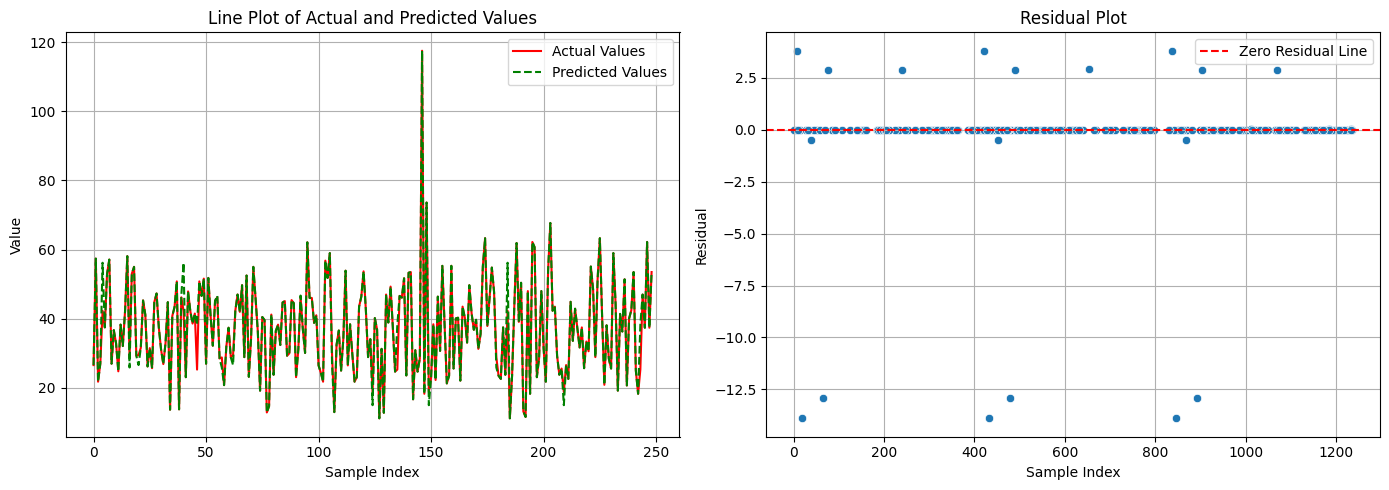

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Line Plot for Actual vs Predicted
ax[0].plot(results['Actual'].values, color='red', label='Actual Values')
ax[0].plot(results['Predicted'].values, color='green', linestyle='--', label='Predicted Values')
ax[0].set_xlabel('Sample Index')
ax[0].set_ylabel('Value')
ax[0].set_title('Line Plot of Actual and Predicted Values')
ax[0].legend()
ax[0].grid(True)

# Residual Plot
results['Residual'] = results['Actual'] - results['Predicted']
sns.scatterplot(x=results.index, y=results['Residual'], ax=ax[1])
ax[1].axhline(0, color='red', linestyle='--', label='Zero Residual Line')
ax[1].set_xlabel('Sample Index')
ax[1].set_ylabel('Residual')
ax[1].set_title('Residual Plot')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()


# TRAINING A MODEL WITH THE DECISION TREE
## Regression decision tree is a best algorithm used for trianing and predicting samples with the help of nodes, edges and leaves. But using the regression decision tree without auto encoder does not give as brilliant result as like using decision tree with auto encoder.

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
X_values=df_noisy.drop(['Y house price of unit area'],axis=1)
y_values=df_noisy['Y house price of unit area']
X_encoded_train, X_encoded_test, y_train, y_test= train_test_split(X_values, y_values, test_size=0.2, random_state=0)

Training and splitting a dataset using regression decision tree is an important aspect for predicting samples.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from keras import Model

Regressor= DecisionTreeRegressor()
Regressor.fit(X_encoded_train, y_train)
y_test_prediction=Regressor.predict(X_encoded_test)

MSE= mean_squared_error(y_test, y_test_prediction)
R_square= r2_score(y_test, y_test_prediction)
print(f"The mean square error with decision tree is:{MSE:.2f}")
print(f"The R square value with decision tree is:{R_square:.2f}")

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_prediction})
print("Results:")
print(results)

The mean square error with decision tree is:0.08
The R square value with decision tree is:0.92
Results:
        Actual  Predicted
1032 -0.837468  -0.837203
124   1.428964   0.729927
184  -1.190584  -1.175409
914  -0.807913  -0.807953
18    0.317864   0.251888
...        ...        ...
856   0.662907   0.663703
159  -0.042692   0.008816
927   1.782860   1.583365
1206 -0.042526   0.774077
1170  1.142178  -0.005192

[249 rows x 2 columns]


**# VISUALIZATION OF ACTUAL AND PREDICTED LABELS USING SCATTER PLOT**

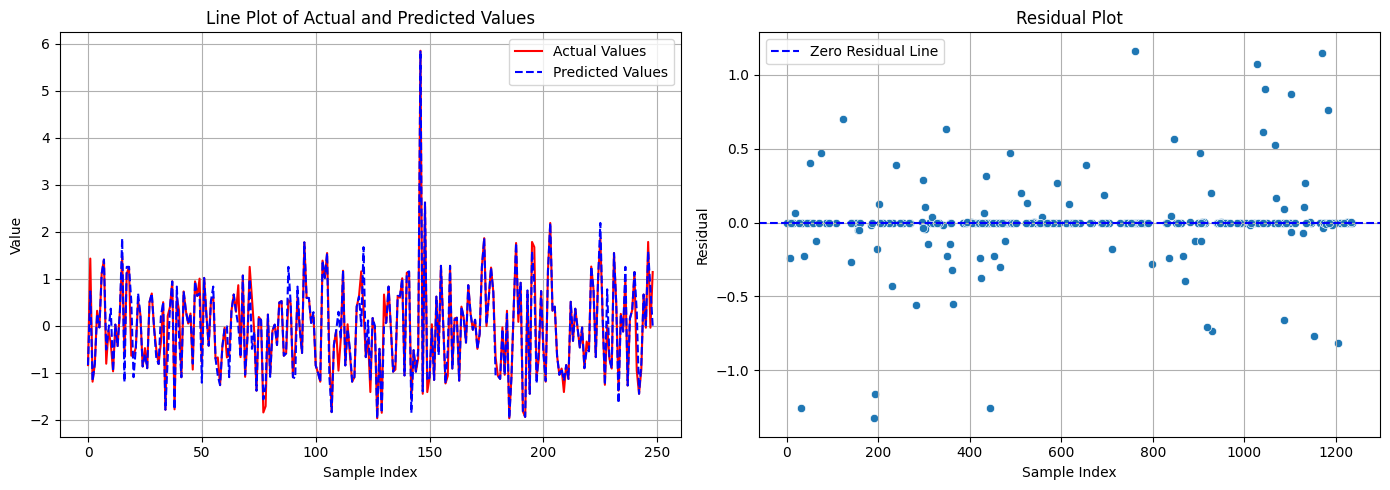

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Line Plot for Actual vs Predicted
ax[0].plot(results['Actual'].values, color='red', label='Actual Values')
ax[0].plot(results['Predicted'].values, color='blue', linestyle='--', label='Predicted Values')
ax[0].set_xlabel('Sample Index')
ax[0].set_ylabel('Value')
ax[0].set_title('Line Plot of Actual and Predicted Values')
ax[0].legend()
ax[0].grid(True)

# Residual Plot
results['Residual'] = results['Actual'] - results['Predicted']
sns.scatterplot(x=results.index, y=results['Residual'], ax=ax[1])
ax[1].axhline(0, color='blue', linestyle='--', label='Zero Residual Line')
ax[1].set_xlabel('Sample Index')
ax[1].set_ylabel('Residual')
ax[1].set_title('Residual Plot')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()
